In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split as tts, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay as cmd, classification_report as cr

In [136]:
path= 'winequalityN.csv'
data= pd.read_csv(path)
print(data.shape,'\n',data.dtypes)

(6497, 13) 
 type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [137]:
df= data.copy()

In [138]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


c:\Users\mmopa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


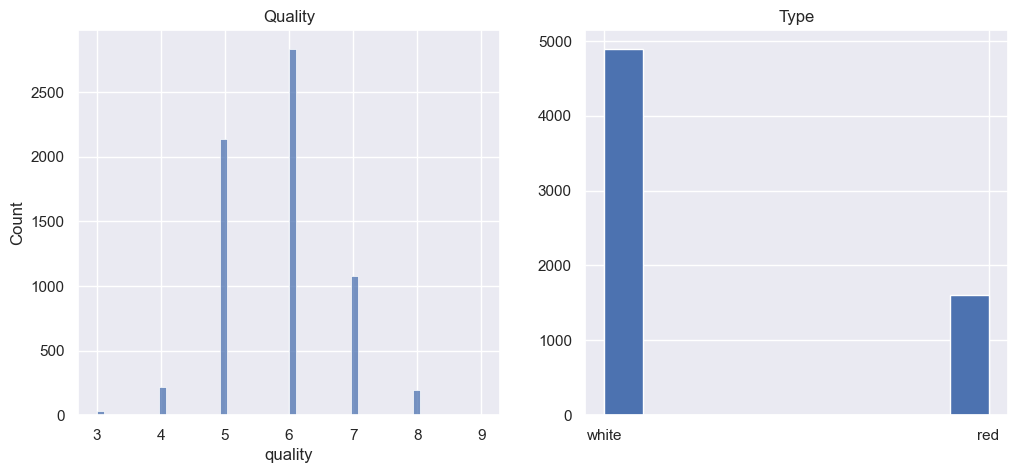

In [139]:
fig, ax= plt.subplots(1, 2, figsize= (12, 5))
#ax[0].hist(df['quality'])
ax[0].set_title('Quality')
#ax[0].set_xlim(3,9)
sns.histplot(data= df, x= 'quality', ax= ax[0])
ax[1].hist(df['type'])
ax[1].set_title('Type')
plt.show()

In [140]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [141]:
df.iloc[:,1:].corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265953
chlorides              -0.200886
fixed acidity          -0.077031
total sulfur dioxide   -0.041385
residual sugar         -0.036825
pH                      0.019366
sulphates               0.038729
free sulfur dioxide     0.055463
citric acid             0.085706
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

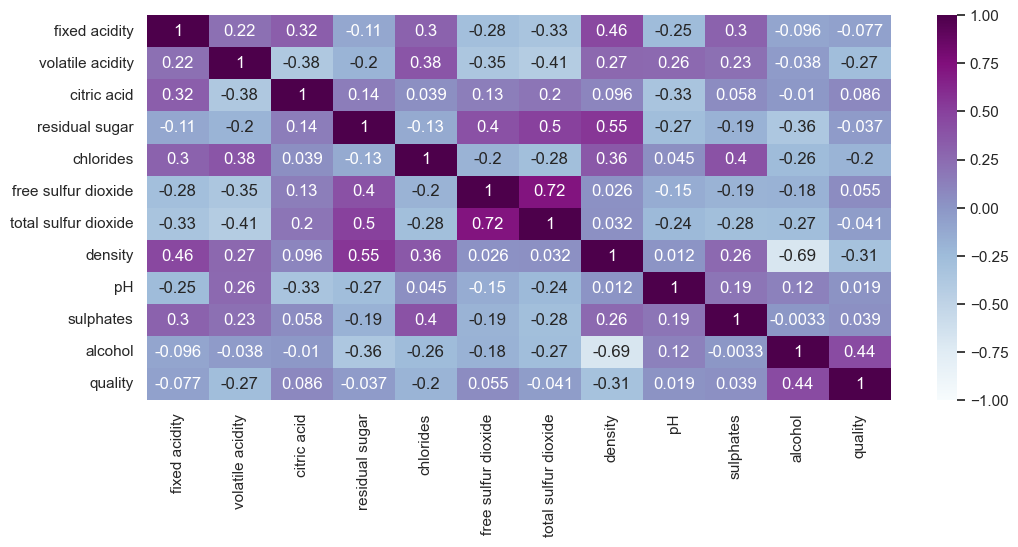

In [142]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.iloc[:,1:].corr(), vmin= -1, vmax= 1, cmap= 'BuPu', annot= True)
plt.show()

c:\Users\mmopa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmopa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmopa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mmopa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

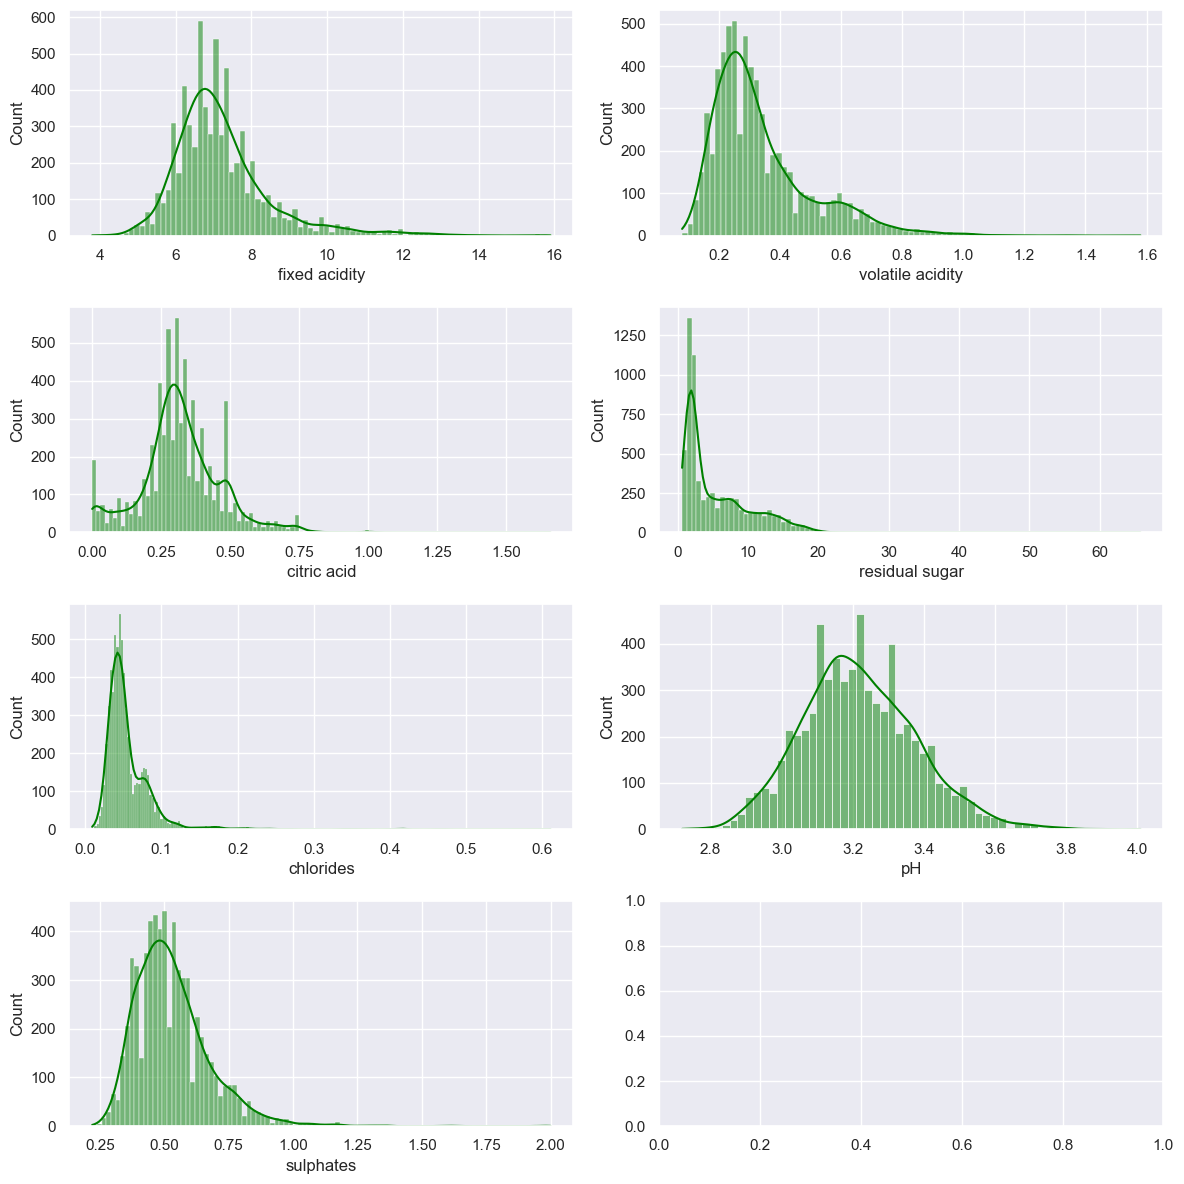

In [143]:
cols = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'pH', 'sulphates']

fig, ax = plt.subplots(4, 2, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=ax[i], kde= True, color= 'green')

plt.tight_layout()
plt.show()


In [144]:
#dropping total sulfur dioxide since its correlated with free sulfur dioxide
df= df.drop('total sulfur dioxide', axis= 1)

In [145]:
#splitting the data
inputs= df.drop('quality', axis= 1)
target= df[['quality']]
x_train, x_test, y_train, y_test= tts(inputs, target, test_size= .2, random_state= 22, stratify= target)

In [146]:
#filling the missing values.
cols= x_train.loc[:, x_train.isna().any()].columns
df_median= x_train[cols].median()
x_train[cols]= x_train[cols].fillna(df_median)
x_test[cols]= x_test[cols].fillna(df_median)

In [147]:
# encoding the first col:
ore= OrdinalEncoder()
x_train= ore.fit_transform(x_train)
x_test= ore.fit_transform(x_test)

In [148]:
# encoding the labels y to 0 > upward for xgboost's sake
le= LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [149]:
#standardizing them for logit_multinomial:
sts= StandardScaler()
x_train_logit= sts.fit_transform(x_train)
x_test_logit= sts.transform(x_test)

In [150]:
#fitting ML models, 'logistic regression'
logit= LogisticRegression(multi_class= 'multinomial')
# xgboost
xgboost= XGBClassifier(objective= 'multi:softmax', num_class= len(df['quality'].unique()))

In [151]:
param_grid_logit = {
    'C': [0.01, 0.1, 1, 10],        # regularization strength
    'penalty': ['l2'],               # safer for small data
    'solver': ['lbfgs'],             # fast and stable
    'max_iter': [500, 1000]          # ensure convergence
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200],       # number of trees
    'max_depth': [3, 5, 7],               # tree depth
    'learning_rate': [0.01, 0.1, 0.2],   # step size
    'subsample': [0.7, 1.0],              # row sampling
    'colsample_bytree': [0.7, 1.0]        # feature sampling
}

In [152]:
cv_logit= RandomizedSearchCV(logit, param_grid_logit, scoring= 'accuracy', cv= 5, verbose= 4)
cv_xgb= RandomizedSearchCV(xgboost, param_grid_xgb, scoring= 'accuracy', cv= 5, verbose= 4)
cv_logit.fit(x_train_logit, y_train)
cv_xgb.fit(x_train, y_train)

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.529 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.530 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.549 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.535 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.529 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.538 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.530 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.549 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.535 total time=   0.0s
[CV 1

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.624 total time=   0.4s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.623 total time=   0.4s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.653 total time=   0.4s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.638 total time=   0.4s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.656 total time=   0.4s
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.599 total time=   0.5s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0;, score=0.617 total time=   0.4s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50,

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_class=7, num_parallel_tree=None,
                                           objective='multi:softmax', ...),
                   param_distributions={'colsample_bytree': [0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 1.0]},
                   scoring='accuracy', verbose=4)

In [153]:
#Testing the models on the holdoutset
xgb_params= cv_xgb.best_params_
logit_params= cv_logit.best_params_
logit_ho= LogisticRegression(multi_class= 'multinomial', **logit_params)
logit_ho.fit(x_train_logit, y_train)
xgb_ho= XGBClassifier(objective= 'multi:softmax', num_class= len(df['quality'].unique()), **xgb_params)
xgb_ho.fit(x_train, y_train)
y_pred_logit= logit_ho.predict(x_test_logit)
y_pred_xgb= xgb_ho.predict(x_test)

In [154]:
print(cr(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.25      0.05      0.08        43
           2       0.62      0.40      0.49       428
           3       0.51      0.80      0.62       567
           4       0.51      0.29      0.37       216
           5       0.50      0.03      0.05        39
           6       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.34      0.22      0.23      1300
weighted avg       0.54      0.53      0.50      1300



c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 640x480 with 0 Axes>

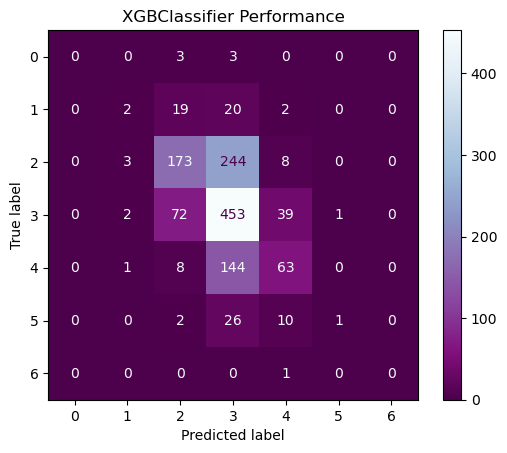

In [155]:
sns.reset_orig()
plt.figure()
cmd.from_predictions(y_test, y_pred_xgb, cmap= 'BuPu_r')
plt.title('XGBClassifier Performance')
plt.show()

In [156]:
print(cr(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.02      0.05        43
           2       0.64      0.45      0.53       428
           3       0.49      0.77      0.60       567
           4       0.43      0.22      0.29       216
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00         1

    accuracy                           0.52      1300
   macro avg       0.37      0.21      0.21      1300
weighted avg       0.53      0.52      0.49      1300



c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 640x480 with 0 Axes>

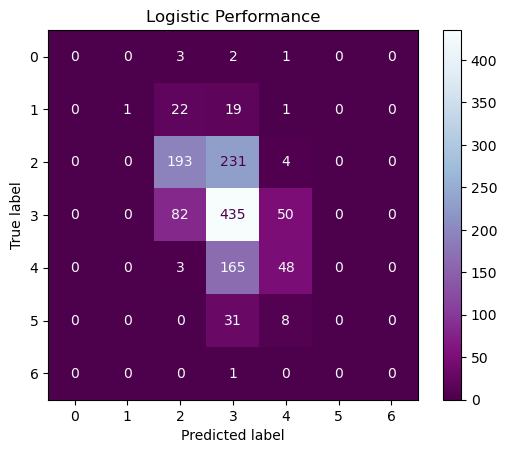

In [157]:
sns.reset_orig()
plt.figure()
cmd.from_predictions(y_test, y_pred_logit, cmap= 'BuPu_r')
plt.title('Logistic Performance')
plt.show()